<b>Tasks:</b>
- Load picture.
- Make 3 methods clusterizations: KMeans, DBSCAN, AgglomerativeClustering.
- Calculate SIMM metric

In [185]:
import matplotlib.pyplot as plt
import cv2
import skimage
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

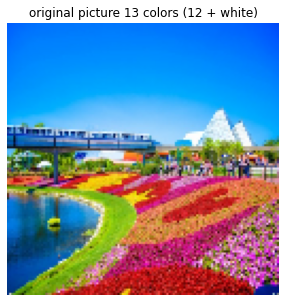

In [186]:
# Step 1. INIT Data

def draw_picture(image, title, bgr=False):
    b, g, r = cv2.split(image) # по умолчанию cv2 почему-то отдает цвета в порядке BGR вместо RGB
    new_image = cv2.merge([r, g, b])
    plt.figure(figsize=(7, 5))
    plt.axis('off')
    plt.imshow(new_image)
    plt.title(title)
    plt.show()
    
img = cv2.imread('datasets_features\clusters.jpg') #palette.png
img = cv2.resize(img, (128, 128))
draw_picture(img, 'original picture 13 colors (12 + white)')

img = img.reshape((-1, 3))

SIMM score for n_clusters=2: 0.36879244652784443
SIMM score for n_clusters=5: 0.5104466967042294
SIMM score for n_clusters=10: 0.6745457056312922
SIMM score for n_clusters=20: 0.763881392594952


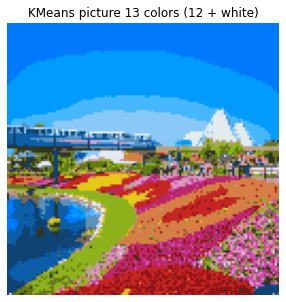

In [187]:
## KMeans
from sklearn.cluster import KMeans
from skimage.metrics import structural_similarity as ssim

for k in [2, 5, 10, 20]:
    algorithm = KMeans(n_clusters=k)
    clusters = algorithm.fit_predict(img)
    clusters = algorithm.cluster_centers_[clusters]
    print(f'SIMM score for n_clusters={k}: {ssim(img, clusters, channel_axis=2, multichannel=True)}')
    
draw_picture(clusters.astype(int).reshape((128, 128, 3)), 'KMeans picture 13 colors (12 + white)')

SIMM score for eps=1: 0.3827832562051572
SIMM score for eps=2: 0.4271735786140248
SIMM score for eps=3: 0.35800560099437556
SIMM score for eps=4: 0.37961291730783936
SIMM score for eps=5: 0.4125890743515617
SIMM score for eps=6: 0.4469533888222257
SIMM score for eps=7: 0.4812794354996263
SIMM score for eps=8: 0.5050099516572807
SIMM score for eps=9: 0.4715023718318469


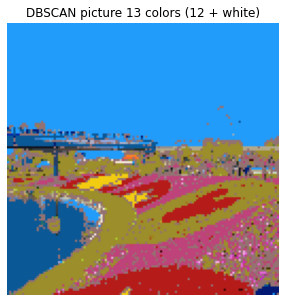

In [188]:
## DBSCAN
from sklearn.cluster import  DBSCAN

for e in np.arange(1, 10, 1):
    algorithm = DBSCAN(eps=e)
    clusters = algorithm.fit_predict(img)

    # calculate centroids
    clusters_centroids = np.concatenate((clusters.reshape((-1, 1)), img), axis=1)
    for i in set(clusters):
        clusters_centroids[clusters_centroids[:, 0]==i, 1] = clusters_centroids[clusters_centroids[:, 0]==i, 1].mean() 
        clusters_centroids[clusters_centroids[:, 0]==i, 2] = clusters_centroids[clusters_centroids[:, 0]==i, 2].mean() 
        clusters_centroids[clusters_centroids[:, 0]==i, 3] = clusters_centroids[clusters_centroids[:, 0]==i, 3].mean() 
    clusters_centroids = clusters_centroids[:, 1:]
    clusters_centroids

    print(f'SIMM score for eps={e}: {ssim(img, clusters_centroids, channel_axis=2, multichannel=True)}')

draw_picture(clusters_centroids.astype(int).reshape((128, 128, 3)), 'DBSCAN picture 13 colors (12 + white)')

SIMM score for n_clusters=2: 0.351157836102625
SIMM score for n_clusters=5: 0.5100190694911221
SIMM score for n_clusters=10: 0.6762107651974941
SIMM score for n_clusters=20: 0.7594556270324894


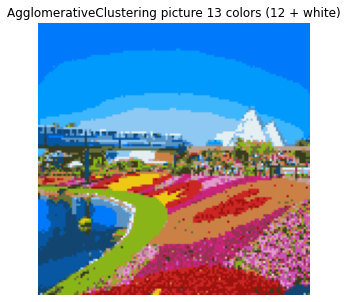

In [189]:
# AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestCentroid


for k in [2, 5, 10, 20]:
    algorithm = AgglomerativeClustering(n_clusters=k)
    clusters = algorithm.fit_predict(img)

    clf = NearestCentroid()
    clf.fit(img, clusters)
    clusters = clf.centroids_[clusters]
    print(f'SIMM score for n_clusters={k}: {ssim(img, clusters, channel_axis=2, multichannel=True)}')

draw_picture(clusters.astype(int).reshape((128, 128, 3)), 'AgglomerativeClustering picture 13 colors (12 + white)')

<b>Вывод: </b>
по метрике SIMM и визуализации лучше справились методы KMeans и AgglomerativeClustering.